In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/distan_lat42.58lon-8.804p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/coron.csv", usecols = ["time","gust_coron"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
         gust_coron
count  17472.000000
mean       7.565907
std        4.450470
min        0.000000
25%        3.861114
50%        6.916672
75%       10.805564
max       34.694472


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17281 entries, 2022-01-03 00:00:00 to 2023-12-31 00:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_coron   17281 non-null  float64
 1   dir0         17281 non-null  float64
 2   snow_prec0   17281 non-null  float64
 3   snowlevel0   17281 non-null  float64
 4   mod0         17281 non-null  float64
 5   wind_gust0   17281 non-null  float64
 6   mslp0        17281 non-null  float64
 7   temp0        17281 non-null  float64
 8   rh0          17281 non-null  float64
 9   visibility0  17281 non-null  float64
 10  lhflx0       17281 non-null  float64
 11  lwflx0       17281 non-null  float64
 12  conv_prec0   17281 non-null  float64
 13  prec0        17281 non-null  float64
 14  swflx0       17281 non-null  float64
 15  shflx0       17281 non-null  float64
 16  cape0        17281 non-null  float64
 17  cin0         17281 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_coron    1.000000
mod0          0.725716
wind_gust0    0.720690
mod2          0.720100
wind_gust1    0.716803
wind_gust2    0.703268
mod1          0.689420
lhflx0        0.233006
lhflx2        0.227940
cape0         0.202546
Name: gust_coron, dtype: float64


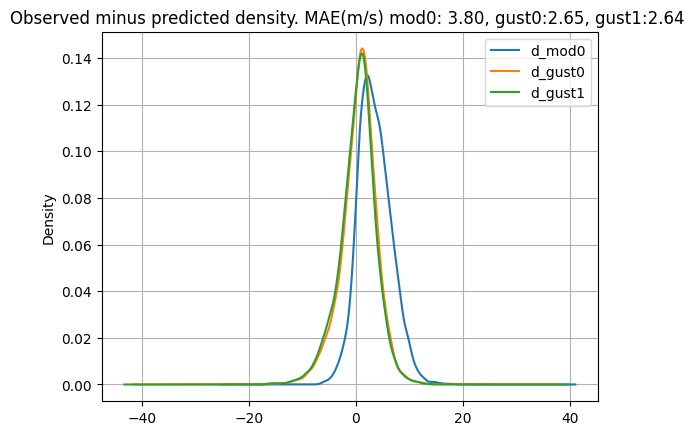

In [3]:
# @title Get meteorologic model d2 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#rename columns
station = station.rename(columns={"gust_udr":"gust_o"})

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/lat42.58lon-8.804p3R1KmD2.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_coron"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_coron, df_all.mod0)
d_mod0 = df_all.gust_coron.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_coron, df_all.mod1)
d_mod1 = df_all.gust_coron.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust0)
d_gust0 = df_all.gust_coron.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust1)
d_gust1 = df_all.gust_coron.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust2)
d_gust2 = df_all.gust_coron.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  1729.000000  1729.000000  1729.000000
mean      7.723996     7.615861    -0.108134
std       4.487533     3.466249     2.919724
min       0.027778     1.954724   -12.849316
25%       3.944448     4.787643    -1.821390
50%       7.000006     6.849867    -0.063889
75%      11.027787    10.055008     1.747918
max      25.166687    22.100295     9.899036
machine learning number: 1
            y_test       y_pred         diff
count  1729.000000  1729.000000  1729.000000
mean      7.534692     7.639463     0.104771
std       4.474846     3.580495     3.012554
min       0.000000     1.806946   -18.054876
25%       3.777781     4.658476    -1.684029
50%       6.861117     6.983894     0.160278
75%      10.805564    10.131397     1.851946
max      32.277804    24.144742    11.348898
machine learning number: 2
            y_test       y_pred         diff
count  1729.000000  1729.000000  1729.000000
mean      7.712862 

,MAE
count,10.000000
mean,2.217000
std,0.058128
min,2.150000
25%,2.185000
50%,2.205000
75%,2.217500
max,2.350000


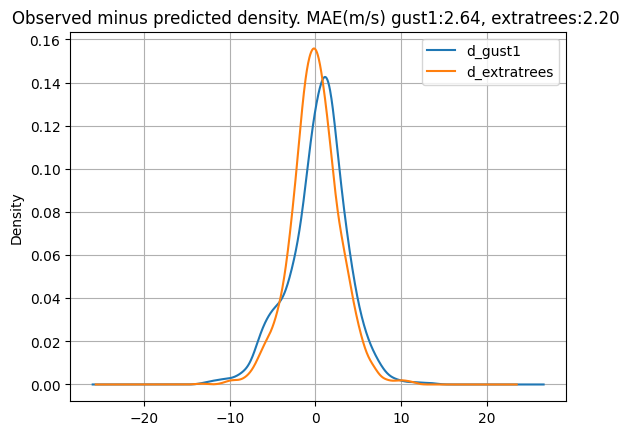

In [4]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 15552, number of used features: 7
[LightGBM] [Info] Start training from score 7.555997
machine learning number: 0
            y_test       y_pred         diff
count  1729.000000  1729.000000  1729.000000
mean      7.723996     7.603707    -0.120288
std       4.487533     3.443737     2.929866
min       0.027778     2.009553   -12.934901
25%       3.944448     4.817334    -1.855931
50%       7.000006     6.811403    -0.055179
75%      11.027787    10.063703     1.669906
max      25.166687    20.883538    10.106007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of dat

,MAE
count,10.000000
mean,2.220000
std,0.037712
min,2.170000
25%,2.195000
50%,2.220000
75%,2.235000
max,2.300000


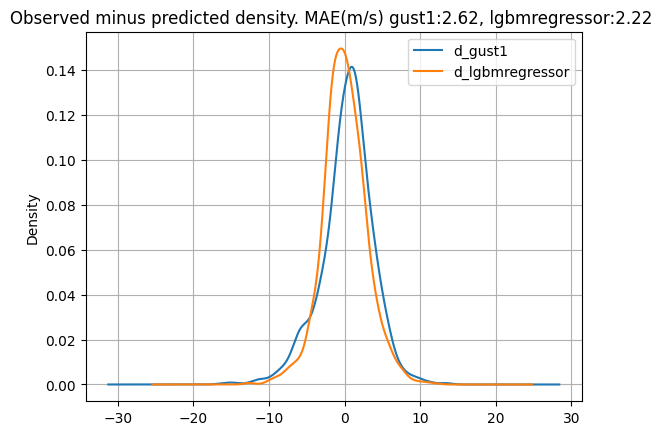

In [5]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [6]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.5277141332626343
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [7]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =2.62). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=2.62, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [2.24, 2.3, 2.22, 2.19, 2.18, 2.17, 2.22, 2.21, 2.25, 2.22]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 15552, number of used features: 10
[LightGBM] [Info] Start training from score 7.555997
machine learning number: 0
            y_test       y_pred         diff
count  1729.000000  1729.000000  1729.000000
mean      7.723996     7.650193    -0.073802
std       4.487533     3.612625     2.536894
min       0.027778     1.964870   -12.701184
25%       3.944448     4.753957    -1.524772
50%       7.000006     6.957268     0.002265
75%      11.027787    10.002634     1.499884
max      25.166687    22.933075    10.619112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of da

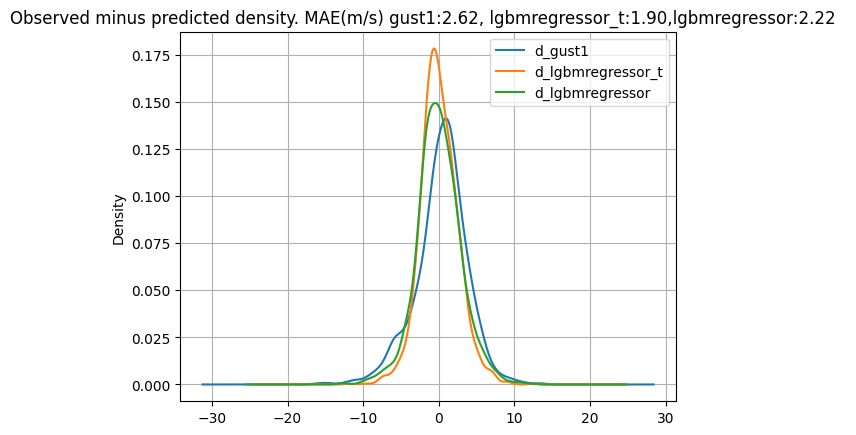

In [8]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [9]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [2.24 2.3  2.22 2.19 2.18 2.17 2.22 2.21 2.25 2.22]

MAE with time variables: [1.93 1.91 1.88 1.87 1.85 1.82 1.89 1.9  1.92 1.9 ]

alpha:  0.01

p_value point:  3.5564117102060177e-12

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [10]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/algorithms/gust_coron_d2.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
